# Read H5 file

In [1]:
import h5py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

In [3]:
import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [4]:
from astropy.time import Time
import astropy.units as u

In [5]:
DATE="20230228" # with "u/dagoret/BPS_manyspectro_v70 in "u/dagoret/BPS_manyspectro_v70"
#DATE="20230301" # with "u/dagoret/BPS_manyspectro_v70 in "u/dagoret/BPS_manyspectro_v71"
#DATE="20230302" # with "u/dagoret/BPS_manyspectro_v70 in "u/dagoret/BPS_manyspectro_v72"

my_collection = "u/dagoret/BPS_manyspectro_v70" # data from february 28th 2023  rebin=2,
#my_collection = "u/dagoret/BPS_manyspectro_v71" # data from fMarch 1st 2023 rebin=2,
#my_collection = "u/dagoret/BPS_manyspectro_v72" # data from fMarch 2nd 2023 rebin=2,

filterdispersername = "empty~holo4_003"

In [6]:
configmode = "PSF2DFFM_REBIN2"
#configmode = "PSF2DFFM_REBIN1"
#ext="_b"
specver="specV2.4"

In [7]:
summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
input_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

In [8]:
hf =  h5py.File(input_file_h5, 'r') 

hf.keys()

<KeysViewHDF5 ['2023022800021', '2023022800022', '2023022800026', '2023022800027', '2023022800039', '2023022800040', '2023022800054', '2023022800055', '2023022800062', '2023022800063', '2023022800070', '2023022800071', '2023022800078', '2023022800079', '2023022800095', '2023022800096', '2023022800108', '2023022800109', '2023022800116', '2023022800117', '2023022800124', '2023022800125', '2023022800135', '2023022800136', '2023022800148', '2023022800149', '2023022800156', '2023022800157', '2023022800164', '2023022800165', '2023022800179', '2023022800180', '2023022800187', '2023022800188', '2023022800195', '2023022800196', '2023022800203', '2023022800204', '2023022800218', '2023022800219', '2023022800233', '2023022800234', '2023022800250', '2023022800251', '2023022800261', '2023022800262', '2023022800270', '2023022800271', '2023022800278', '2023022800279', '2023022800286', '2023022800287', '2023022800297', '2023022800298', '2023022800305', '2023022800306', '2023022800313', '2023022800314',

In [9]:
group = hf.get('2023022800040')

In [10]:
for k in group.attrs.keys():
    print('{} => {}'.format(k, group.attrs[k]))

exposure => 2023022800040
index => 5
spec_airmass => 2.11765398522377
spec_camera_angle => 29.150966628747
spec_date_obs => 2023-03-01T00:40:57.110992661Z
spec_dec => -87.4986907901233
spec_filter_label => empty
spec_header_a2_fit => 1.0
spec_header_airmass => 2.11765398522377
spec_header_am_fit => 2.11765398522377
spec_header_cam_rot => 29.150966628747
spec_header_chi2_fit => 10.02300628810103
spec_header_d2ccd => 187.3530003158672
spec_header_date-obs => 2023-03-01T00:40:57.110992661Z
spec_header_dec => -87.4986907901233
spec_header_exptime => 30.0
spec_header_filter => empty
spec_header_grating => holo4_003
spec_header_ha => -208.6049708885535
spec_header_lbda_ref => 597.2571590735706
spec_header_lshift => 0.0
spec_header_meanfwhm => 5.518086576887585
spec_header_outhum => 0
spec_header_outpress => 0
spec_header_outtemp => 0
spec_header_parangle => 152.055793878638
spec_header_pixshift => 0.09712287847736392
spec_header_psf_reg => 1.339483906324865
spec_header_rebin => 2
spec_header

In [11]:
list(group.items())

[('spec_covmatrix',
  <HDF5 dataset "spec_covmatrix": shape (1137, 1137), type ">f8">),
 ('spec_data', <HDF5 dataset "spec_data": shape (1137,), type ">f8">),
 ('spec_data_next_order',
  <HDF5 dataset "spec_data_next_order": shape (1137,), type ">f8">),
 ('spec_err', <HDF5 dataset "spec_err": shape (1137,), type ">f8">),
 ('spec_err_next_order',
  <HDF5 dataset "spec_err_next_order": shape (1137,), type ">f8">),
 ('spec_lambdas', <HDF5 dataset "spec_lambdas": shape (1137,), type ">f8">),
 ('spec_spectrogram',
  <HDF5 dataset "spec_spectrogram": shape (185, 1137), type ">f8">),
 ('spec_spectrogram_bgd',
  <HDF5 dataset "spec_spectrogram_bgd": shape (185, 1137), type ">f8">),
 ('spec_spectrogram_bgd_rms',
  <HDF5 dataset "spec_spectrogram_bgd_rms": shape (185, 1137), type ">f8">),
 ('spec_spectrogram_err',
  <HDF5 dataset "spec_spectrogram_err": shape (185, 1137), type ">f8">),
 ('spec_spectrogram_fit',
  <HDF5 dataset "spec_spectrogram_fit": shape (51165,), type ">f8">),
 ('spec_spectro

In [12]:
targetname=group.attrs["spec_target_label"]
exposure = group.attrs["exposure"]
airmass = group.attrs["spec_airmass"]
lambdas = np.array(group.get("spec_lambdas"))
data =  np.array(group.get("spec_data"))
data_next_order=  np.array(group.get("spec_data_next_order"))
spectrogram =  np.array(group.get("spec_spectrogram"))

In [13]:
title = f"{targetname}, exposure = {exposure}, am={airmass:.2f}"

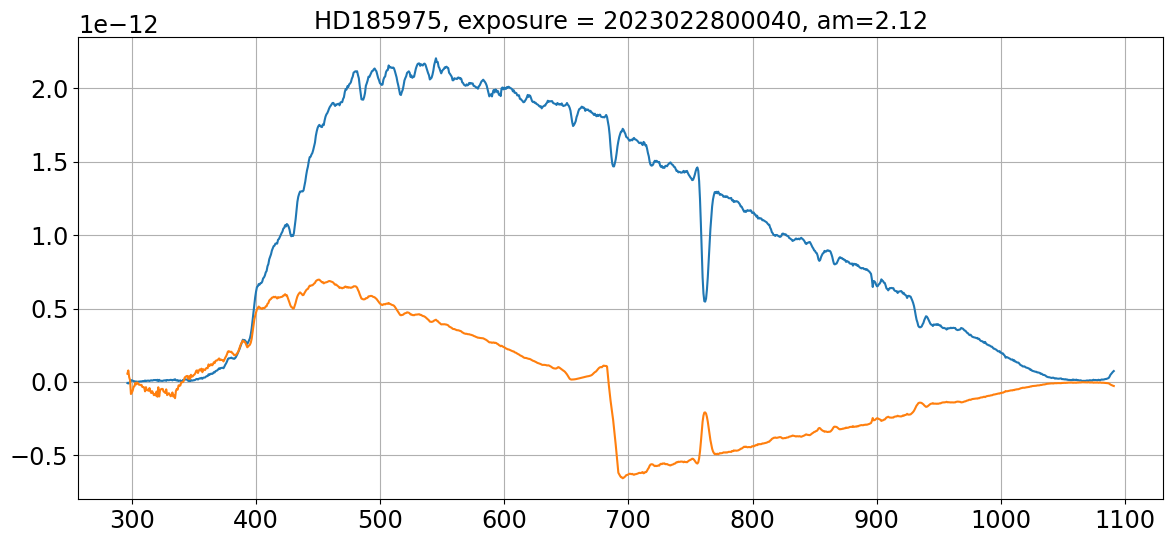

In [14]:
plt.plot(lambdas,data)
plt.plot(lambdas,data_next_order)
plt.title(title)
plt.grid()

In [15]:
spectrogram.shape

(185, 1137)

Text(0.5, 1.0, 'HD185975, exposure = 2023022800040, am=2.12')

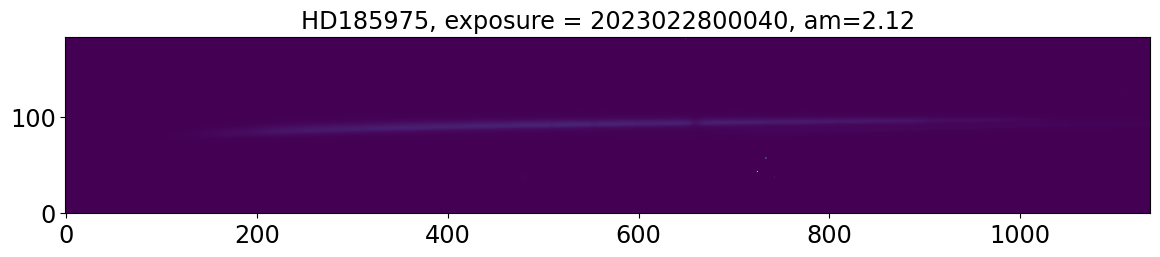

In [16]:
plt.imshow(spectrogram,origin="lower")
plt.title(title)

In [17]:
hf.close() 